ValueError: num must be 1 <= num <= 35, not 36

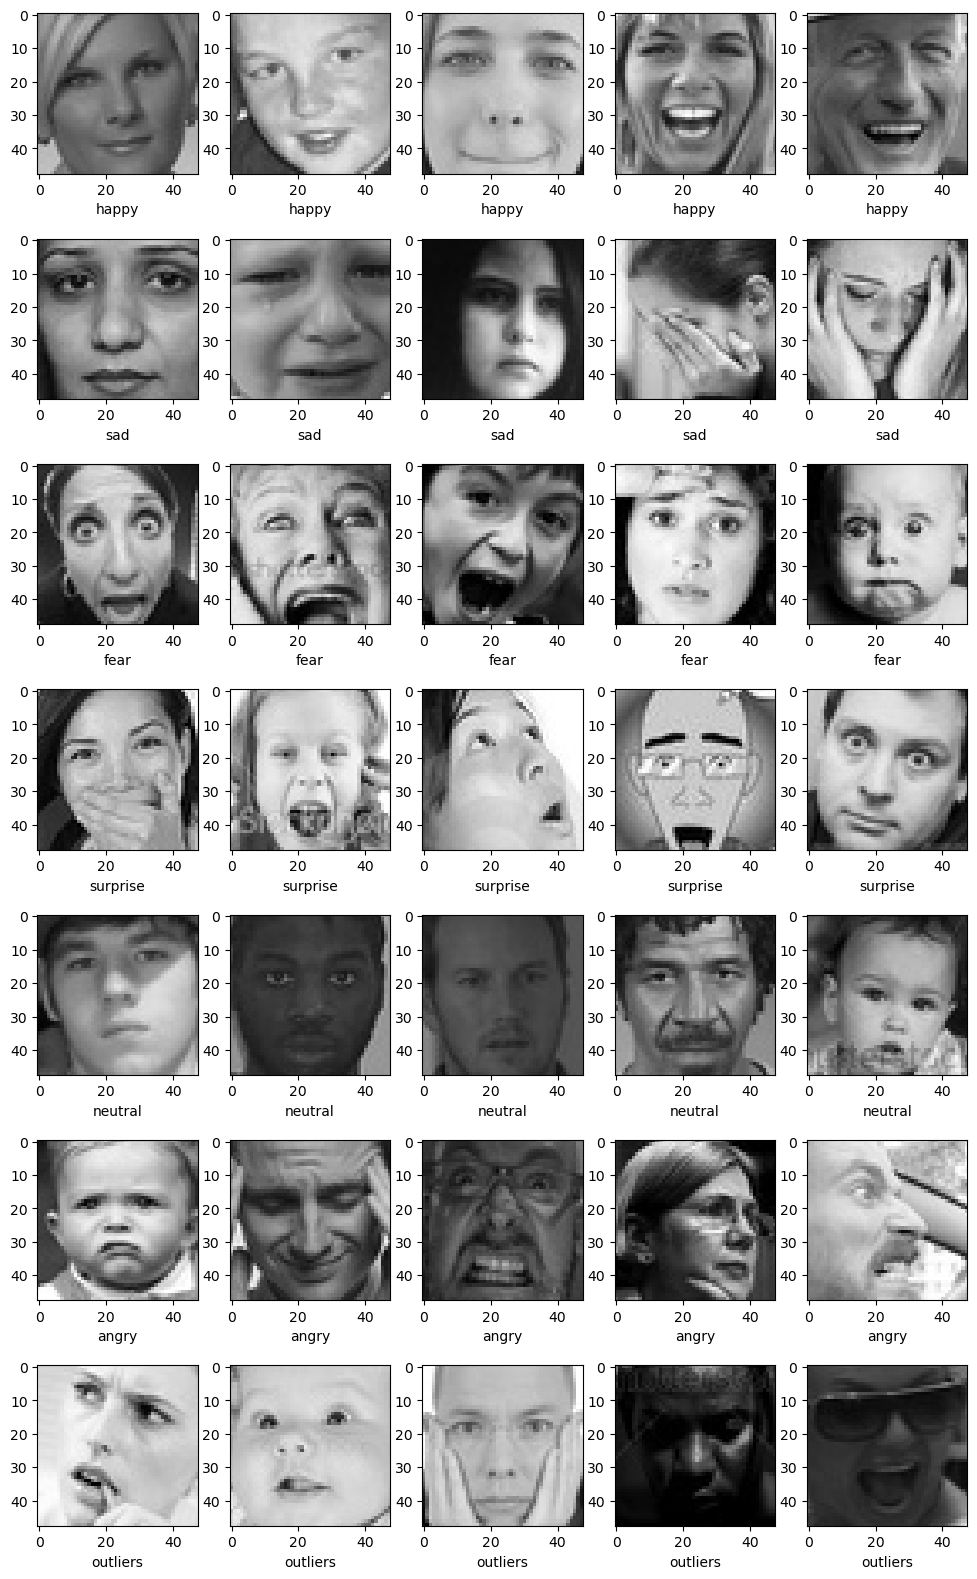

In [4]:
# displaying some images for every different expression

import numpy as np
import seaborn as sns
#from keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import load_img
import matplotlib.pyplot as plt
import os

# size of the image: 48*48 pixels
pic_size = 48



# input path for the images
base_path = "./data/train/"


plt.figure(0, figsize=(12,20))
cpt = 0

for expression in os.listdir(base_path):
    for i in range(1,6):
        cpt = cpt + 1
        plt.subplot(7,5,cpt)
        img = load_img(base_path + expression + "/" +os.listdir(base_path   + expression)[i], target_size=(pic_size, pic_size))
        plt.xlabel(expression)
        plt.imshow(img, cmap="gray")

plt.tight_layout()
plt.show()

In [4]:
# check teh shape 
import numpy as np
from PIL import Image

# Load the image
img = Image.open('data_processed/filtered/train/disgust/0.jpg')


# Get the dimensions of the image
width, height = img.size

# Determine the scaling factor based on the longer side of the image
longer_side = max(width, height)
scale = 256 / longer_side

# Calculate the new dimensions after scaling
new_width = int(scale * width)
new_height = int(scale * height)

# Resize the image using the new dimensions
img = img.resize((new_width, new_height))

# Crop the center of the image to get an input shape of 256 x 256 x 3
left = (new_width - 256) / 2
top = (new_height - 256) / 2
right = (new_width + 256) / 2
bottom = (new_height + 256) / 2
img = img.crop((left, top, right, bottom))

# Convert the image to a numpy array
img_arr = np.array(img)

# Print the shape of the array
print(img_arr.shape)

(256, 256)


In [45]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import pandas as pd
import glob

# Set the path to the folder containing the training images
train_path = 'data_processed/filtered/train/happy'

# Create a list of all the image file paths in the angry folder
image_paths = glob.glob(os.path.join(train_path, '*.jpg'))

# Create a Pandas dataframe with the image file paths and class labels
df_train = pd.DataFrame({'filepath': image_paths, 'class': 'happy'})
# Define the image size and batch size
img_height, img_width = 32,32
batch_size = 32

# Create an ImageDataGenerator for data augmentation and preprocessing
train_datagen = ImageDataGenerator(
    rescale=1./255, # rescale pixel values to [0, 1]
    rotation_range=20, # randomly rotate images by up to 20 degrees
    width_shift_range=0.1, # randomly shift the image horizontally by up to 10%
    height_shift_range=0.1, # randomly shift the image vertically by up to 10%
    horizontal_flip=True, # randomly flip images horizontally
    zoom_range=0.1, # randomly zoom images by up to 10%
    validation_split=0.2
)

# Create a flow_from_directory generator for the training data
train_generator = train_datagen.flow_from_dataframe(
    dataframe=df_train,
    x_col='filepath', # column containing the file paths
    y_col='class', # path to the training data folder
    target_size=(img_height, img_width), # resize the images to the specified size
    batch_size=batch_size, # set the batch size
    class_mode='categorical', # set the class mode to categorical
    shuffle=True, # shuffle the data for training
    color_mode='grayscale',
    subset='training',
    seed = 12

)

# # Create a validation generator with subset='validation'
# val_generator = train_datagen.flow_from_directory(
#     train_df,
#     train_path,
#     target_size=(256, 256),
#     batch_size=32,
#     color_mode='grayscale', # specify grayscale color mode
#     class_mode='categorical',
#     shuffle=True,
#     subset='validation' ,# specify subset as 'validation'
#     seed= 12
# )

# # test data
# test_path = 'data/test/'


Found 5676 validated image filenames belonging to 1 classes.


In [13]:
# import tensorflow as tf
# from tensorflow import keras
# from tensorflow.keras import layers

# # Define the number of classes
# num_classes = 7

# # Define the model architecture
# model = keras.Sequential([
#     layers.Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
#     layers.MaxPooling2D(pool_size=(2, 2)),
#     layers.Flatten(),
#     layers.Dense(128, activation='relu'),
#     layers.Dense(num_classes, activation='softmax')
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(train_generator , epochs=10, validation_data=val_dataset)

# # Evaluate the model
# loss, accuracy = model.evaluate(test_dataset)
# print(f'Test loss: {loss}, Test accuracy: {accuracy}')


NameError: name 'val_dataset' is not defined

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the input shape and number of classes
input_shape = (256, 256, 1)
num_classes = 7

# Create a sequential model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Add a flatten layer and dense layers
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.20))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model with categorical crossentropy loss and Adam optimizer
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [11]:
# Set the number of training epochs
epochs = 10

# Train the model on the training data
history = model.fit(
    train_generator, # training data generator
    epochs=epochs, # number of epochs to train for
    verbose=1, # print training progress
    validation_data=val_generator 
)


Epoch 1/10
707/707 [==============================] - 1525s 2s/step - loss: 1.8550 - accuracy: 0.2471 - val_loss: 1.8101 - val_accuracy: 0.2540
Epoch 2/10
707/707 [==============================] - 1425s 2s/step - loss: 1.7767 - accuracy: 0.2609 - val_loss: 1.7484 - val_accuracy: 0.2701
Epoch 3/10
707/707 [==============================] - 1721s 2s/step - loss: 1.7599 - accuracy: 0.2761 - val_loss: 1.7414 - val_accuracy: 0.2756
Epoch 4/10
707/707 [==============================] - 1761s 2s/step - loss: 1.7358 - accuracy: 0.2900 - val_loss: 1.7038 - val_accuracy: 0.3121
Epoch 5/10
707/707 [==============================] - 1827s 3s/step - loss: 1.7201 - accuracy: 0.3021 - val_loss: 1.6929 - val_accuracy: 0.3199
Epoch 6/10
707/707 [==============================] - 1676s 2s/step - loss: 1.7031 - accuracy: 0.3073 - val_loss: 1.6562 - val_accuracy: 0.3420
Epoch 7/10
707/707 [==============================] - 1576s 2s/step - loss: 1.6804 - accuracy: 0.3291 - val_loss: 1.6395 - val_accuracy:

In [19]:
from keras import layers
from keras.layers import Flatten, Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, GlobalMaxPooling2D, Dropout
from keras.layers import Reshape, UpSampling2D, Conv2DTranspose, LeakyReLU
from keras.models import Sequential, Model, load_model
from keras.preprocessing import image
#from keras.preprocessing.image import load_img
import tensorflow as tf



from keras.utils import load_img
from keras.utils import img_to_array
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.imagenet_utils import decode_predictions
from keras.applications import densenet
from keras.utils import layer_utils, np_utils
from keras.utils.data_utils import get_file
from keras.applications.imagenet_utils import preprocess_input
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model
from keras.initializers import glorot_uniform
from keras import losses
from keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint, Callback
from keras.optimizers import Adam, RMSprop
from keras import regularizers
from keras import backend as K
from keras import datasets
from sklearn.metrics import confusion_matrix, classification_report

import tensorflow as tf

In [46]:
latent_dim = 100
height = 32
width = 32
channels = 1
batch_size = 32

In [47]:
def build_generator():
    generator_input = layers.Input(shape=(latent_dim,))

    # First, transform the input into a 16x16 128-channels feature map
    x = layers.Dense(128 * 16 * 16)(generator_input)
    x = layers.LeakyReLU()(x)
    x = layers.Reshape((16, 16, 128))(x)

    # Then, add a convolution layer
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Upsample to 32x32
    x = layers.Conv2DTranspose(256, 4, strides=2, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Few more conv layers
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(256, 5, padding='same')(x)
    x = layers.LeakyReLU()(x)

    # Produce a 32x32 1-channel feature map
    x = layers.Conv2D(channels, 7, padding='same')(x)
    x = layers.LeakyReLU()(x)
    generator = Model(generator_input, x)
    generator.summary()

    return generator

In [48]:
def build_discriminator():
    discriminator_input = layers.Input(shape=(height, width, channels))
    x = layers.Conv2D(128, 3)(discriminator_input)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Conv2D(128, 4, strides=2)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Flatten()(x)

    # One dropout layer - important trick!
    x = layers.Dropout(0.4)(x)
    x = layers.Dense(10)(x)
    x = layers.LeakyReLU()(x)
    x = layers.Dropout(0.4)(x)

    # Classification layer
    x = layers.Dense(1)(x)

    discriminator = Model(discriminator_input, x)
    discriminator.summary()

    return discriminator

In [49]:
def build_gan(discriminator, generator):
    # Set discriminator weights to non-trainable
    # (will only apply to the `gan` model)
    discriminator.trainable = False

    gan_input = layers.Input(shape=(latent_dim,))
    gan_output = discriminator(generator(gan_input))
    gan = Model(gan_input, gan_output)

    return gan

In [50]:
discriminator = build_discriminator()
discriminator_optimizer = RMSprop(lr=0.001, clipvalue=1.0, decay=1e-8)
discriminator.compile(optimizer=discriminator_optimizer, loss='mse')

Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 32, 32, 1)]       0         
                                                                 
 conv2d_88 (Conv2D)          (None, 30, 30, 128)       1280      
                                                                 
 leaky_re_lu_126 (LeakyReLU)  (None, 30, 30, 128)      0         
                                                                 
 conv2d_89 (Conv2D)          (None, 14, 14, 128)       262272    
                                                                 
 leaky_re_lu_127 (LeakyReLU)  (None, 14, 14, 128)      0         
                                                                 
 conv2d_90 (Conv2D)          (None, 6, 6, 128)         262272    
                                                                 
 leaky_re_lu_128 (LeakyReLU)  (None, 6, 6, 128)        0  

/opt/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/rmsprop.py:143: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [51]:
generator = build_generator()
gan = build_gan(discriminator, generator)
gan_optimizer = RMSprop(lr=0.0001, clipvalue=1.0, decay=1e-8)
gan.compile(optimizer=gan_optimizer, loss='mse')

Model: "model_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_16 (InputLayer)       [(None, 100)]             0         
                                                                 
 dense_39 (Dense)            (None, 32768)             3309568   
                                                                 
 leaky_re_lu_131 (LeakyReLU)  (None, 32768)            0         
                                                                 
 reshape_17 (Reshape)        (None, 16, 16, 128)       0         
                                                                 
 conv2d_92 (Conv2D)          (None, 16, 16, 256)       819456    
                                                                 
 leaky_re_lu_132 (LeakyReLU)  (None, 16, 16, 256)      0         
                                                                 
 conv2d_transpose_29 (Conv2D  (None, 32, 32, 256)      104

In [53]:
# Train the GAN
X_train = (train_generator[0][0].astype(np.float32) - 0.5) * 2
epochs = 10000
batch_size = 32

for epoch in range(epochs):

    # Generate random noise vectors
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate fake images using the generator
    gen_images = generator.predict(noise)

    # Get a batch of real images from the dataset
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    # Concatenate the real and fake images
    images = np.concatenate([real_images, gen_images])

    # Labels for real and fake images
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Label smoothing for real images
    real_labels *= 0.9 + np.random.random(real_labels.shape) * 0.1

    # Train the discriminator on the real and fake images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator by trying to fool the discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Discriminator Accuracy: {100*d_loss}, Generator Loss: {g_loss}")
       # Save a sample of the generated images every 100 epochs
    if (epoch+1) % 100 == 0:
        gen_images = generator.predict(np.random.normal(0, 1, (25, latent_dim)))
        gen_images = 0.5 * gen_images + 0.5 # Rescale to [0, 1]
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_images[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(f"gan_images_epoch{epoch+1}.png")
        plt.close()


1/1 [==============================] - 2s 2s/step
Epoch 1/10000, Discriminator Loss: 1.8855808600783348, Discriminator Accuracy: 188.55808600783348, Generator Loss: 1.6314170360565186
1/1 [==============================] - 2s 2s/step
Epoch 2/10000, Discriminator Loss: 0.6239297720603645, Discriminator Accuracy: 62.39297720603645, Generator Loss: 0.8926739692687988
1/1 [==============================] - 2s 2s/step
Epoch 3/10000, Discriminator Loss: 0.4589467365294695, Discriminator Accuracy: 45.89467365294695, Generator Loss: 0.8431936502456665
1/1 [==============================] - 2s 2s/step
Epoch 4/10000, Discriminator Loss: 0.19189149141311646, Discriminator Accuracy: 19.189149141311646, Generator Loss: 0.946575403213501
1/1 [==============================] - 2s 2s/step
Epoch 5/10000, Discriminator Loss: 0.15892461314797401, Discriminator Accuracy: 15.892461314797401, Generator Loss: 0.8409337997436523
1/1 [==============================] - 2s 2s/step
Epoch 6/10000, Discriminator Lo

KeyboardInterrupt: 

In [54]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint(filepath='gan_model_weights.{epoch:02d}.h5',
                             save_weights_only=True)
gan.save_weights('gan_weights.h5')
generator.save_weights('generator_weights.h5')
discriminator.save_weights('discriminator_weights.h5')

checkpoint.on_epoch_end(epoch)

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 3398, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/var/folders/5n/zdsqqtvs4ml7dvhr54rp68x00000gr/T/ipykernel_13842/3100097470.py", line 8, in <cell line: 8>
    checkpoint.on_epoch_end(epoch)
  File "/opt/miniconda3/lib/python3.10/site-packages/keras/callbacks.py", line 1476, in on_epoch_end
  File "/opt/miniconda3/lib/python3.10/site-packages/keras/callbacks.py", line 1513, in _save_model
  File "/opt/miniconda3/lib/python3.10/site-packages/keras/callbacks.py", line 1606, in _get_file_path
    f'Failed to format this callback filepath: "{self.filepath}". '
AttributeError: 'NoneType' object has no attribute 'distribute_strategy'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/opt/miniconda3/lib/python3.10/site-packages/IPython/core/interactiveshell.py", line 1993, i

In [55]:
# load the saved weights for the generator and discriminator
generator.load_weights('generator_weights.h5')
discriminator.load_weights('discriminator_weights.h5')
gan.load_weights('gan_weights.h5')
# rebuild the GAN model with the saved weights
gan = Sequential()
gan.add(generator)
gan.add(discriminator)
gan.compile(loss='binary_crossentropy', optimizer=Adam(lr=0.0002, beta_1=0.5))

/opt/miniconda3/lib/python3.10/site-packages/keras/optimizers/optimizer_v2/adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.


In [57]:
epochs = 100
for epoch in range(epochs):

    # Generate random noise vectors
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate fake images using the generator
    gen_images = generator.predict(noise)

    # Get a batch of real images from the dataset
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    # Concatenate the real and fake images
    images = np.concatenate([real_images, gen_images])

    # Labels for real and fake images
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Label smoothing for real images
    real_labels *= 0.9 + np.random.random(real_labels.shape) * 0.1

    # Train the discriminator on the real and fake images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator by trying to fool the discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss}, Discriminator Accuracy: {100*d_loss}, Generator Loss: {g_loss}")
       # Save a sample of the generated images every 100 epochs
    if (epoch+1) % 10 == 0:
        gen_images = generator.predict(np.random.normal(0, 1, (25, latent_dim)))
        gen_images = 0.5 * gen_images + 0.5 # Rescale to [0, 1]
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_images[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(f"gan_images_epoch{epoch+1}.png")
        plt.close()

1/1 [==============================] - 4s 4s/step
Epoch 1/100, Discriminator Loss: 0.04006354883313179, Discriminator Accuracy: 4.006354883313179, Generator Loss: 4.904555320739746
1/1 [==============================] - 2s 2s/step
Epoch 2/100, Discriminator Loss: 0.04420725256204605, Discriminator Accuracy: 4.420725256204605, Generator Loss: 10.652850151062012
1/1 [==============================] - 2s 2s/step
Epoch 3/100, Discriminator Loss: 0.04574084933847189, Discriminator Accuracy: 4.574084933847189, Generator Loss: 6.089199066162109
1/1 [==============================] - 2s 2s/step
Epoch 4/100, Discriminator Loss: 0.01998103503137827, Discriminator Accuracy: 1.998103503137827, Generator Loss: 6.005980968475342
1/1 [==============================] - 3s 3s/step
Epoch 5/100, Discriminator Loss: 0.031908389180898666, Discriminator Accuracy: 3.1908389180898666, Generator Loss: 7.790849685668945
1/1 [==============================] - 3s 3s/step
Epoch 6/100, Discriminator Loss: 0.0262123

KeyboardInterrupt: 

In [18]:

# Train the GAN
epochs = 10000
batch_size = 32

for epoch in range(epochs):

    # Generate random noise vectors
    noise = np.random.normal(0, 1, (batch_size, latent_dim))

    # Generate fake images using the generator
    gen_images = generator.predict(noise)

    # Get a batch of real images from the dataset
    real_images = X_train[np.random.randint(0, X_train.shape[0], batch_size)]

    # Concatenate the real and fake images
    images = np.concatenate([real_images, gen_images])

    # Labels for real and fake images
    real_labels = np.ones((batch_size, 1))
    fake_labels = np.zeros((batch_size, 1))

    # Label smoothing for real images
    real_labels *= 0.9 + np.random.random(real_labels.shape) * 0.1

    # Train the discriminator on the real and fake images
    d_loss_real = discriminator.train_on_batch(real_images, real_labels)
    d_loss_fake = discriminator.train_on_batch(gen_images, fake_labels)
    d_loss = 0.5 * np.add(d_loss_real, d_loss_fake)

    # Train the generator by trying to fool the discriminator
    noise = np.random.normal(0, 1, (batch_size, latent_dim))
    g_loss = gan.train_on_batch(noise, np.ones((batch_size, 1)))

    # Print the progress
    print(f"Epoch {epoch+1}/{epochs}, Discriminator Loss: {d_loss[0]}, Discriminator Accuracy: {100*d_loss[1]}, Generator Loss: {g_loss}")
       # Save a sample of the generated images every 100 epochs
    if (epoch+1) % 100 == 0:
        gen_images = generator.predict(np.random.normal(0, 1, (25, latent_dim)))
        gen_images = 0.5 * gen_images + 0.5 # Rescale to [0, 1]
        fig, axs = plt.subplots(5, 5)
        cnt = 0
        for i in range(5):
            for j in range(5):
                axs[i,j].imshow(gen_images[cnt,:,:,0], cmap='gray')
                axs[i,j].axis('off')
                cnt += 1
        fig.savefig(f"gan_images_epoch{epoch+1}.png")
        plt.close()

 




1/1 [==============================] - 0s 285ms/step
Epoch 1/10000, Discriminator Loss: 0.6945715248584747, Discriminator Accuracy: 34.375, Generator Loss: 0.6934638619422913
1/1 [==============================] - 0s 100ms/step
Epoch 2/10000, Discriminator Loss: 0.6956048011779785, Discriminator Accuracy: 37.5, Generator Loss: 0.6931875944137573
1/1 [==============================] - 0s 99ms/step
Epoch 3/10000, Discriminator Loss: 0.6940575242042542, Discriminator Accuracy: 25.0, Generator Loss: 0.6931628584861755
1/1 [==============================] - 0s 101ms/step
Epoch 4/10000, Discriminator Loss: 0.6949088871479034, Discriminator Accuracy: 17.1875, Generator Loss: 0.6930769085884094
1/1 [==============================] - 0s 104ms/step
Epoch 5/10000, Discriminator Loss: 0.6952205300331116, Discriminator Accuracy: 18.75, Generator Loss: 0.692969799041748
1/1 [==============================] - 0s 99ms/step
Epoch 6/10000, Discriminator Loss: 0.6941095888614655, Discriminator Accuracy: 

KeyboardInterrupt: 